Causal SNPs: ['SNP_151', 'SNP_1801', 'SNP_3501']


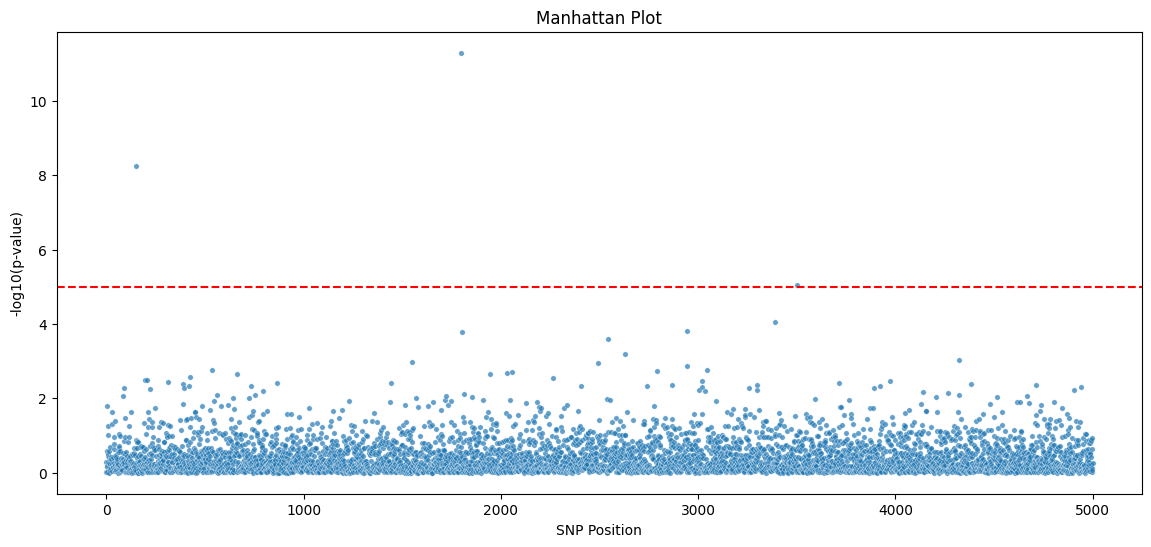

Bonferroni threshold: 5.00
Significant SNPs found:


,SNP,p,-log10(p)
150,SNP_151,5.515090e-09,8.258447
1800,SNP_1801,5.118013e-12,11.290899
3500,SNP_3501,8.945941e-06,5.048374


In [2]:
# Install libs if needed
import sys
!{sys.executable} -m pip install pandas numpy statsmodels matplotlib seaborn

# Imports
import numpy as np, pandas as pd, statsmodels.api as sm, matplotlib.pyplot as plt, seaborn as sns

# --- Step 1: Simulate Genomic & Phenotype Data ---
np.random.seed(42)
n_plants, n_snps = 300, 5000
G = pd.DataFrame(np.random.randint(0,3,(n_plants,n_snps)), columns=[f"SNP_{i+1}" for i in range(n_snps)])
base_yield = np.random.normal(100,10,n_plants)

# Causal SNPs effects
causal = [150,1800,3500]
phenotype = base_yield + G.iloc[:,causal[0]]*3.5 + G.iloc[:,causal[1]]*5 + G.iloc[:,causal[2]]*4
y = pd.Series(phenotype, name="Yield")

print(f"Causal SNPs: {[G.columns[i] for i in causal]}")

# --- Step 2: GWAS ---
results = [{'SNP': snp, 'p': sm.OLS(y, sm.add_constant(G[snp])).fit().pvalues[snp]} for snp in G.columns]
gwas = pd.DataFrame(results)
gwas['-log10(p)'] = -np.log10(gwas['p'])
gwas['Pos'] = range(len(gwas))
threshold = -np.log10(0.05/n_snps)

# --- Step 3: Manhattan Plot ---
plt.figure(figsize=(14,6))
sns.scatterplot(x='Pos', y='-log10(p)', data=gwas, s=15, alpha=0.7)
plt.axhline(threshold,color='r',linestyle='--'); plt.title("Manhattan Plot")
plt.xlabel("SNP Position"); plt.ylabel("-log10(p-value)"); plt.show()

# --- Step 4: Significant SNPs ---
sig = gwas[gwas['-log10(p)']>threshold]
print(f"Bonferroni threshold: {threshold:.2f}")
if not sig.empty:
    print("Significant SNPs found:")
    display(sig[['SNP','p','-log10(p)']].head())
else:
    print("No significant SNPs found.")
